In [11]:

# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# Importing Data file
data = pd.read_csv('new_dataset.csv')
dataset = pd.DataFrame(data)
dataset.columns

Index(['frame_video', 'id_pedestrian', 'distance_to_me', 'distance_to_road',
       'vehicle_annotation', 'is_Looking', 'is_Crossing', 'distance_to_cars',
       'xbl', 'ybl', 'xbr', 'label', 'video_name'],
      dtype='object')

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3350 entries, 0 to 3349
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   frame_video         3350 non-null   int64 
 1   id_pedestrian       3350 non-null   int64 
 2   distance_to_me      3350 non-null   int64 
 3   distance_to_road    3350 non-null   int64 
 4   vehicle_annotation  3350 non-null   int64 
 5   is_Looking          3350 non-null   int64 
 6   is_Crossing         3350 non-null   int64 
 7   distance_to_cars    3350 non-null   int64 
 8   xbl                 3350 non-null   int64 
 9   ybl                 3350 non-null   int64 
 10  xbr                 3350 non-null   int64 
 11  label               3350 non-null   int64 
 12  video_name          3350 non-null   object
dtypes: int64(12), object(1)
memory usage: 340.4+ KB


In [13]:
dataset.describe().transpose()


count        mean         std    min    25%    50%  \
frame_video         3350.0  136.591045   95.947320    0.0   58.0  120.0   
id_pedestrian       3350.0    5.571940    6.498551    0.0    1.0    5.0   
distance_to_me      3350.0  240.992836  107.559023    0.0  177.0  268.0   
distance_to_road    3350.0   27.763881   76.080928    0.0    0.0    1.0   
vehicle_annotation  3350.0    1.848060    1.171685    0.0    1.0    2.0   
is_Looking          3350.0    0.455224    0.498065    0.0    0.0    0.0   
is_Crossing         3350.0    0.520000    0.499674    0.0    0.0    1.0   
distance_to_cars    3350.0  540.251642  423.013994   51.0  149.0  371.0   
xbl                 3350.0  870.683582  445.355500    0.0  594.0  826.0   
ybl                 3350.0  838.555224  107.589789  670.0  754.0  811.0   
xbr                 3350.0  949.470746  443.843684   54.0  680.0  881.0   
label               3350.0    2.285970    0.744852    1.0    2.0    2.0   

                        75%     max  
frame_video          195.00   447.0  
id_pedestrian          9.00    29.0  
distance_to_me       325.75   409.0  
distance_to_road      14.00   905.0  
vehicle_annotation     3.00     4.0  
is_Looking             1.00     1.0  
is_Crossing            1.00     1.0  
distance_to_cars     952.00  1774.0  
xbl                 1214.00  1871.0  
ybl                  903.00  1080.0  
xbr                 1281.00  1920.0  
label                  3.00     3.0

In [14]:

from sklearn.model_selection import train_test_split

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

target = dataset["label"]
features = dataset.drop(["id_pedestrian","frame_video", "video_name", 'label'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.2, random_state = 10)
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model = SVC(C= .1, kernel='linear', gamma= 1, probability=True)
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.8365671641791045
0.8119402985074626


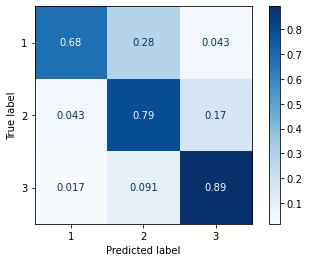

Precision: 0.8180919412023407
Recall: 0.7863710585533128
0.8019179325359227


In [15]:

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(svc_model, X_test, y_test, normalize='true', cmap='Blues')
plt.show()

import numpy as np
def Average(lst):
    return sum(lst) / len(lst)
cm = plot_confusion_matrix(svc_model, X_test, y_test)
cm = cm.confusion_matrix
from operator import truediv
import numpy as np

tp = np.diag(cm)
prec = list(map(truediv, tp, np.sum(cm, axis=0)))
rec = list(map(truediv, tp, np.sum(cm, axis=1)))
print ('Precision: {}\nRecall: {}'.format(Average(prec), Average(rec)))
print( (2*Average(prec)*Average(rec))/(Average(prec)+Average(rec)))


In [16]:
import pickle
s = pickle.dumps(svc_model)
with open('DT_svm.pkl', 'wb') as fid:
    pickle.dump(svc_model, fid)

In [17]:

# Building a Support Vector Machine on train data
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train, y_train)

SVC()

In [18]:

print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.7376865671641791
0.6880597014925374


In [19]:

#Building a Support Vector Machine on train data(changing the kernel)
svc_model  = SVC(kernel='poly')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.7485074626865672
0.7149253731343284


In [20]:

svc_model = SVC(kernel='sigmoid')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

0.32798507462686566
0.3253731343283582
